In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
import time
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(37.67462186572054, -85.67699961947753),
 (-47.0596326070807, 178.44706505677368),
 (58.40209001568846, 51.20676408089136),
 (29.550414554382883, -168.90453815108592),
 (26.422723166880175, -174.6199412284767),
 (-14.647938351740308, 177.8077906406669),
 (-17.847832738648293, -13.587468898429535),
 (-61.17443533965135, -98.40526895631288),
 (58.89831207030019, -109.38728067120863),
 (33.79327784134945, -160.719251929947),
 (72.04677184249223, 174.15051274664154),
 (-6.769572781404463, 4.21544606009769),
 (14.144286601055782, 7.956533575961146),
 (42.097410653108284, -18.58763691224786),
 (-5.786429788839371, -140.48804933649683),
 (-57.571107346707805, 145.53636054846805),
 (18.720978814019176, 124.5903551587985),
 (-73.66957573515324, 112.41850479415348),
 (-64.17441785993378, -153.9830698013832),
 (60.39823116447997, -82.83602508022645),
 (17.05561108686183, 23.263951807687988),
 (38.875091461014875, -128.68263976621998),
 (-47.893122884577124, 155.6253951533526),
 (-64.513823592639

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=" + weather_api_key 
url

'http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=3e4bb4d4964f18991c2941d2dc524e13'

In [6]:
# Create emprty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | elizabethtown
Processing Record 2 of Set 1 | waipawa
Processing Record 3 of Set 1 | kosino
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | asau
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | grand centre
City not found. Skipping...
Processing Record 9 of Set 1 | komsomolskiy
Processing Record 10 of Set 1 | gamba
Processing Record 11 of Set 1 | mayahi
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | san vicente
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | kutum
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | hermanus
Processing Record 22 

Processing Record 35 of Set 4 | eyl
Processing Record 36 of Set 4 | yefira
City not found. Skipping...
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | beian
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | hualmay
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | vila
Processing Record 43 of Set 4 | west lafayette
Processing Record 44 of Set 4 | okhotsk
Processing Record 45 of Set 4 | upata
Processing Record 46 of Set 4 | pilar
Processing Record 47 of Set 4 | tulum
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | seydi
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | masterton
Processing Record 4 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 5 of Set 5 | libreville
Processing Record 6 of Set 5 | cadillac
Processing Reco

City not found. Skipping...
Processing Record 27 of Set 8 | opelika
Processing Record 28 of Set 8 | kuito
Processing Record 29 of Set 8 | saleaula
City not found. Skipping...
Processing Record 30 of Set 8 | flagstaff
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | sozimskiy
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | loanda
Processing Record 35 of Set 8 | lithakia
Processing Record 36 of Set 8 | denison
Processing Record 37 of Set 8 | talnakh
Processing Record 38 of Set 8 | bilibino
Processing Record 39 of Set 8 | tahe
Processing Record 40 of Set 8 | bonnyville
Processing Record 41 of Set 8 | zhanaozen
Processing Record 42 of Set 8 | navahrudak
Processing Record 43 of Set 8 | burns lake
Processing Record 44 of Set 8 | kingston
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | martapura
Processing Record 47 of Set 8 | muhos
Processing Record 48 of Set 8 | sechura
Processing Record 49 of Se

Processing Record 17 of Set 12 | rio gallegos
Processing Record 18 of Set 12 | cowra
Processing Record 19 of Set 12 | lichfield
Processing Record 20 of Set 12 | yelizovo
Processing Record 21 of Set 12 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 22 of Set 12 | makaha
Processing Record 23 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 12 | necochea
Processing Record 25 of Set 12 | chagda
City not found. Skipping...
Processing Record 26 of Set 12 | ken caryl
Processing Record 27 of Set 12 | mayskiy
Processing Record 28 of Set 12 | huancavelica
Processing Record 29 of Set 12 | carahue
Processing Record 30 of Set 12 | utiroa
City not found. Skipping...
Processing Record 31 of Set 12 | karamea
City not found. Skipping...
Processing Record 32 of Set 12 | isla vista
Processing Record 33 of Set 12 | reconquista
Processing Record 34 of Set 12 | qandala
Processing Record 35 of Set 12 | port macquarie
Processing Record 36 of Set 12 | the pas
Pro

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elizabethtown,37.6940,-85.8591,36.66,61,100,0.00,US,2022-01-28 01:52:48
1,Waipawa,-41.4122,175.5153,64.92,48,32,8.14,NZ,2022-01-28 01:56:58
2,Kosino,58.4127,51.2782,1.54,97,95,5.48,RU,2022-01-28 01:56:58
3,Kapaa,22.0752,-159.3190,80.11,59,11,4.00,US,2022-01-28 01:55:04
4,Asau,46.4333,26.4000,34.72,90,96,7.83,RO,2022-01-28 01:56:59
5,Jamestown,42.0970,-79.2353,24.71,63,100,8.01,US,2022-01-28 01:53:20
6,Punta Arenas,-53.1500,-70.9167,50.11,87,0,9.22,CL,2022-01-28 01:56:59
7,Komsomolskiy,40.4272,71.7189,27.82,63,100,4.61,UZ,2022-01-28 01:53:14
8,Gamba,-2.6500,10.0000,76.39,88,92,4.97,GA,2022-01-28 01:57:00
9,Mayahi,13.9553,7.6712,58.37,29,1,12.57,NE,2022-01-28 01:57:00


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Elizabethtown,US,2022-01-28 01:52:48,37.6940,-85.8591,36.66,61,100,0.00
1,Waipawa,NZ,2022-01-28 01:56:58,-41.4122,175.5153,64.92,48,32,8.14
2,Kosino,RU,2022-01-28 01:56:58,58.4127,51.2782,1.54,97,95,5.48
3,Kapaa,US,2022-01-28 01:55:04,22.0752,-159.3190,80.11,59,11,4.00
4,Asau,RO,2022-01-28 01:56:59,46.4333,26.4000,34.72,90,96,7.83
5,Jamestown,US,2022-01-28 01:53:20,42.0970,-79.2353,24.71,63,100,8.01
6,Punta Arenas,CL,2022-01-28 01:56:59,-53.1500,-70.9167,50.11,87,0,9.22
7,Komsomolskiy,UZ,2022-01-28 01:53:14,40.4272,71.7189,27.82,63,100,4.61
8,Gamba,GA,2022-01-28 01:57:00,-2.6500,10.0000,76.39,88,92,4.97
9,Mayahi,NE,2022-01-28 01:57:00,13.9553,7.6712,58.37,29,1,12.57


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant field from the DataFram for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
today = time.strftime("%x")
today

'01/27/22'

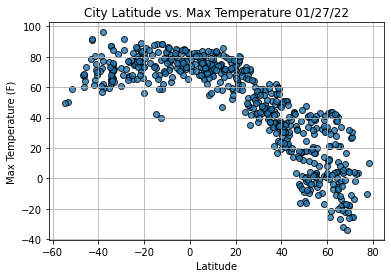

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

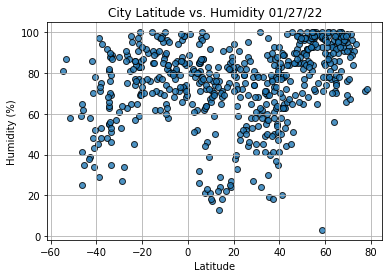

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

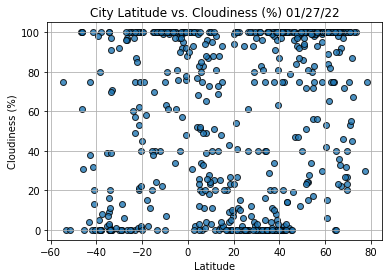

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

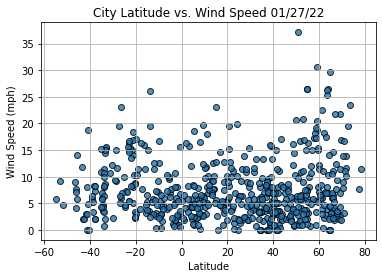

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

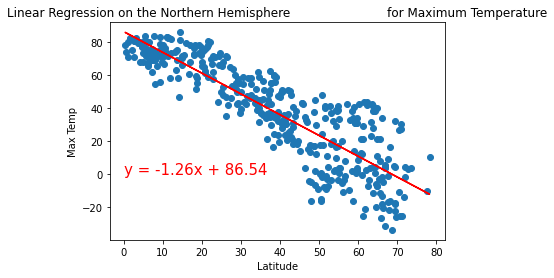

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

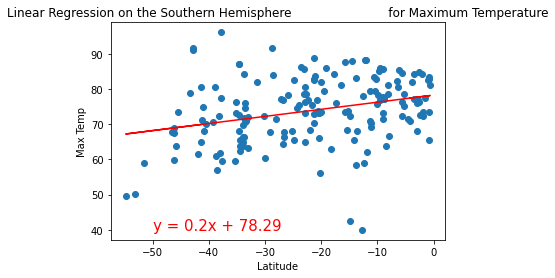

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,40))


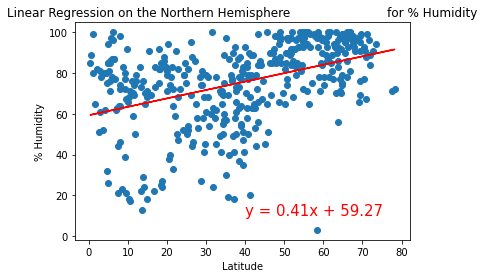

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

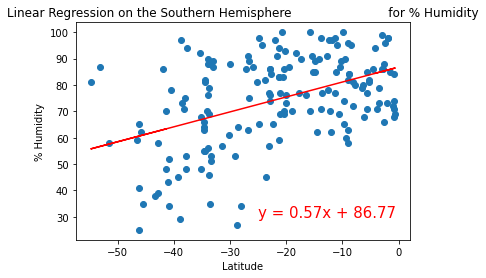

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

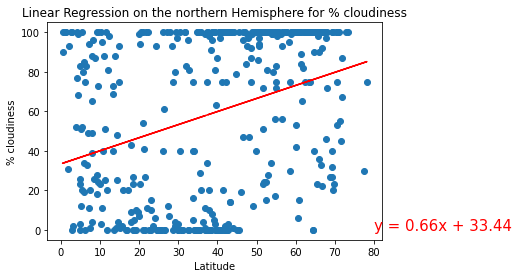

In [45]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression on the northern Hemisphere for % cloudiness', '% cloudiness', (80,0))

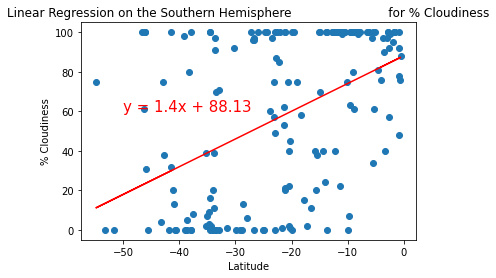

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

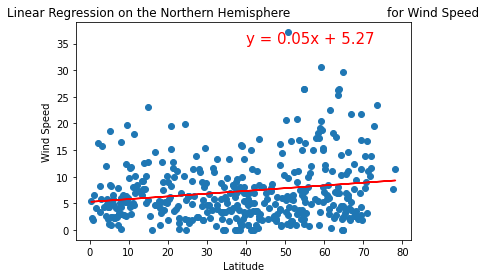

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

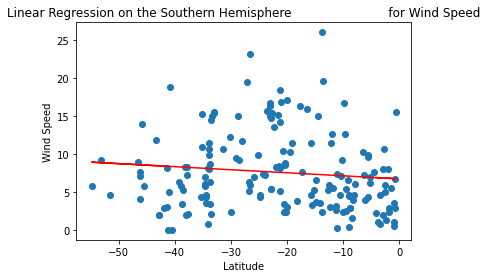

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))